<a href="https://colab.research.google.com/github/KenyanGeek/Australian-birds-classifier/blob/master/Spectrogram_Code_4_beats_optimized_98__accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here is the deep learning code for respirosa

In [2]:
# make your Google Drive accessible
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive
/content/gdrive/My Drive/4beats


In [0]:
from fastai.vision import *


In [59]:

import os
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/gdrive/My Drive/4beats'
classes_dir = ['/60bpm', '/70bpm', '/75bpm', '/76bpm','/77bpm','/78bpm','/79bpm','/80bpm','/82bpm','/83bpm','/84bpm','/85bpm','/86bpm','/89bpm','/90bpm']

val_ratio = 0.20

for cls in classes_dir:
    os.makedirs(root_dir +'/train' + cls)
    os.makedirs(root_dir +'/val' + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio ))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

    print('Total images: '+ str(cls), len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir +'/val' + cls)


Total images: /60bpm 56
Training:  44
Validation:  12
Total images: /70bpm 67
Training:  53
Validation:  14
Total images: /75bpm 185
Training:  148
Validation:  37
Total images: /76bpm 43
Training:  34
Validation:  9
Total images: /77bpm 52
Training:  41
Validation:  11
Total images: /78bpm 242
Training:  193
Validation:  49
Total images: /79bpm 124
Training:  99
Validation:  25
Total images: /80bpm 172
Training:  137
Validation:  35
Total images: /82bpm 52
Training:  41
Validation:  11
Total images: /83bpm 70
Training:  56
Validation:  14
Total images: /84bpm 56
Training:  44
Validation:  12
Total images: /85bpm 183
Training:  146
Validation:  37
Total images: /86bpm 103
Training:  82
Validation:  21
Total images: /89bpm 112
Training:  89
Validation:  23
Total images: /90bpm 63
Training:  50
Validation:  13


In [0]:
path = '/content/gdrive/My Drive/4beats/'
img_size = 224
tfms = get_transforms(do_flip=False)
bs = 64
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, train='train', valid='val', size=img_size, bs = bs) 

In [61]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [62]:
learn.fit(10)



epoch,train_loss,valid_loss,accuracy,time
0,2.719396,3.823063,0.300310,00:13
1,1.861808,2.301893,0.442724,00:13
2,1.425057,0.738185,0.789474,00:13
3,1.156703,0.495323,0.848297,00:13
4,0.939938,0.480132,0.866873,00:13
5,0.778415,0.383290,0.894737,00:13
6,0.660259,0.379213,0.888545,00:13
7,0.564388,0.464706,0.854489,00:13
8,0.483860,0.329907,0.888545,00:13
9,0.416995,0.287008,0.897833,00:12


In [64]:
learn.save('stage-1')
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.263640,0.274995,0.916409,00:14
1,0.236575,0.229014,0.938080,00:13
2,0.214763,0.199700,0.938080,00:13
3,0.185828,0.173209,0.934985,00:13
4,0.160547,0.157819,0.962848,00:13
5,0.131883,0.149754,0.959752,00:13
6,0.114477,0.124018,0.959752,00:13
7,0.102458,0.106523,0.972136,00:13
8,0.087124,0.096592,0.975232,00:13
9,0.078237,0.096002,0.978328,00:13


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


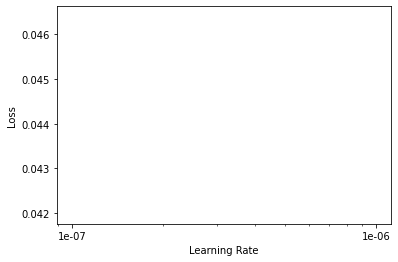

In [66]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.save('stage-2')
learn.load('stage-2')
learn.unfreeze()
learn.fit_one_cycle(12, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.058777,0.092077,0.981424,00:14
1,0.057699,0.100309,0.975232,00:13
2,0.049901,0.087118,0.984520,00:13
3,0.045414,0.095084,0.981424,00:13
4,0.045063,0.068609,0.984520,00:13
5,0.049505,0.077185,0.975232,00:13
6,0.050164,0.072637,0.975232,00:13
7,0.043360,0.066746,0.981424,00:13
8,0.037867,0.063073,0.984520,00:13
9,0.034671,0.064655,0.981424,00:13


In [70]:
interp = ClassificationInterpretation.from_learner(learn)


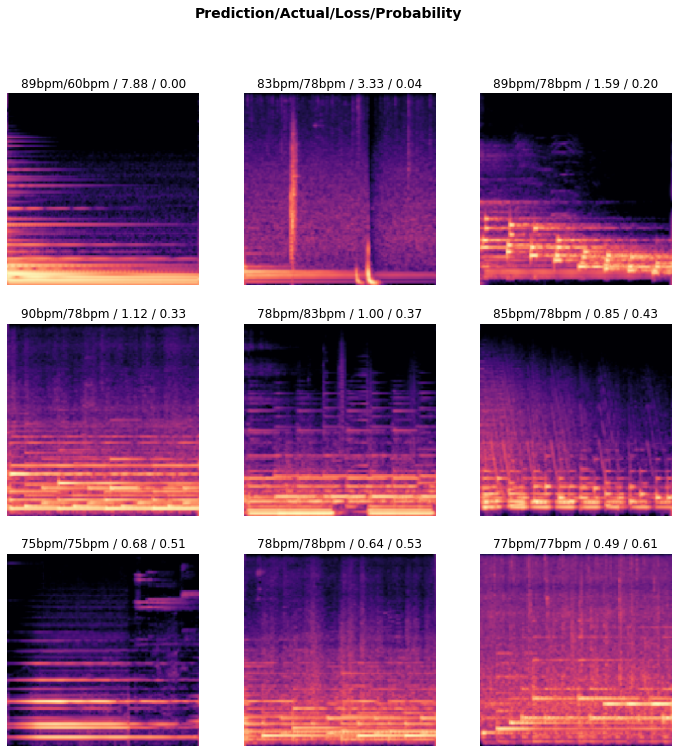

In [71]:
interp.plot_top_losses(9, figsize=(12,12) )


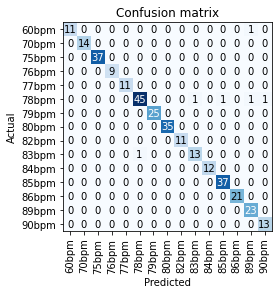

In [72]:
interp.plot_confusion_matrix()


In [74]:
interp.most_confused(min_val=1)


[('60bpm', '89bpm', 1),
 ('78bpm', '83bpm', 1),
 ('78bpm', '85bpm', 1),
 ('78bpm', '89bpm', 1),
 ('78bpm', '90bpm', 1),
 ('83bpm', '78bpm', 1)]